In [ ]:
!pip install pyngrok

In [ ]:
from google.colab import userdata
NGROK_TOKEN = userdata.get('NGROK_TOKEN')

In [ ]:
!ngrok config add-authtoken $NGROK_TOKEN

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


## vLLM

In [ ]:
!pip install vllm lm-format-enforcer streamlit chromadb PyPDF2 langchain

In [ ]:
from huggingface_hub import notebook_login, login
from google.colab import userdata

HF_KEY = userdata.get('HF_KEY')
login(token=HF_KEY)
# notebook_login()

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
!docker pull public.ecr.aws/q9t5s3a7/vllm-cpu-release-repo:v0.8.5.post1

/bin/bash: line 1: docker: command not found


In [ ]:
import vllm
import torch
import os
os.environ["VLLM_TARGET_DEVICE"] = "cpu"

#model_id = 'unsloth/gemma-3-12b-it-qat-bnb-4bit'
# model_id = 'meta-llama/Llama-2-7b-chat-hf'
# model_id = 'unsloth/tinyllama-bnb-4bit'
model_id = 'unsloth/Qwen3-8B-bnb-4bit'

# model_id = '1bitLLM/bitnet_b1_58-3B'

llm = vllm.LLM(model=model_id,
               dtype=torch.float16,
               swap_space=0,
               device='cpu'
               #quantization=nf4_config,
               #max_model_len=752,
               #gpu_memory_utilization=0.8,
               #max_model_len=672
               )

WARNING 05-24 20:07:33 [config.py:2972] Casting torch.bfloat16 to torch.float16.
INFO 05-24 20:07:33 [config.py:717] This model supports multiple tasks: {'embed', 'generate', 'reward', 'score', 'classify'}. Defaulting to 'generate'.
WARNING 05-24 20:07:33 [config.py:830] bitsandbytes quantization is not fully optimized yet. The speed can be slower than non-quantized models.
WARNING 05-24 20:07:33 [arg_utils.py:1536] The model has a long context length (40960). This may causeOOM during the initial memory profiling phase, or result in low performance due to small KV cache size. Consider setting --max-model-len to a smaller value.
INFO 05-24 20:07:33 [config.py:1804] Disabled the custom all-reduce kernel because it is not supported on current platform.


NotImplementedError: 

In [ ]:
!python -V

Python 3.11.12


In [ ]:
prompt = [{'role':'user','content':'ola, tudo bem?'}]
from vllm import SamplingParams

sampling_params = SamplingParams(max_tokens=2048)
ouput = llm.chat(prompt, sampling_params=sampling_params)
print(ouput)

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

[RequestOutput(request_id=2, prompt=None, prompt_token_ids=[151644, 872, 198, 7924, 11, 55696, 31915, 30, 151645, 198, 151644, 77091, 198], encoder_prompt=None, encoder_prompt_token_ids=None, prompt_logprobs=None, outputs=[CompletionOutput(index=0, text='<think>\nOkay, the user greeted me with "ola, tudo bem?" which means "hello, how are you?" in Portuguese. I need to respond in a friendly and helpful manner.\n\nFirst, I should acknowledge their greeting. Since they used Portuguese, maybe I can switch to Portuguese to be more inclusive. But the user might be comfortable with both languages. I should check the previous messages if there\'s a preference, but in this case, it\'s the first message.\n\nNext, I should ask how they\'re doing and offer assistance. Keep it simple and welcoming. Make sure to use proper Portuguese grammar and vocabulary. Also, be open to helping with any questions they might have.\n\nWait, the user might be testing if I can switch languages. So responding in Port

In [ ]:
print(ouput[0].outputs[0].text)

<think>
Okay, the user greeted me with "ola, tudo bem?" which means "hello, how are you?" in Portuguese. I need to respond in a friendly and helpful manner.

First, I should acknowledge their greeting. Since they used Portuguese, maybe I can switch to Portuguese to be more inclusive. But the user might be comfortable with both languages. I should check the previous messages if there's a preference, but in this case, it's the first message.

Next, I should ask how they're doing and offer assistance. Keep it simple and welcoming. Make sure to use proper Portuguese grammar and vocabulary. Also, be open to helping with any questions they might have.

Wait, the user might be testing if I can switch languages. So responding in Portuguese would be good. Let me confirm the translation: "Hello, how are you?" becomes "Olá, como você está?" Then, offer help: "Estou aqui para ajudar. Como posso ser útil para você hoje?" That's correct.

No need to overcomplicate. Keep it friendly and open-ended. M

In [ ]:
#import vllm

!export VLLM_TARGET_DEVICE="cpu" && \
  vllm serve unsloth/Qwen3-8B-bnb-4bit \
  --multi-step-stream-outputs \
  --dtype 'float16' \
  --device 'cpu'
    # --max-num-batched-tokens 2048 \
    #& streamlit run app.py \
    #& ngrok http 8501

INFO 05-24 17:15:25 [__init__.py:243] No platform detected, vLLM is running on UnspecifiedPlatform
2025-05-24 17:15:25.845755: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748106925.879039    7453 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748106925.888286    7453 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
WARNING 05-24 17:15:33 [_custom_ops.py:21] Failed to import from vllm._C with ImportError('libcuda.so.1: cannot open shared object file: No such file or directory')
INFO 05-24 17:15:46 [api_server.py:1043] vLLM API server version 0.8.5.post1
INFO 05-24 17:15:46 [api_server.py:1044] args: Namespace(subparser='serve', model_tag='unsloth/Q

In [ ]:

question = 'Please give me information about Michael Jordan. You MUST answer using the following json schema: '
question_with_schema = f'{question}{AnswerFormat.schema_json()}'
prompt = get_prompt(question_with_schema)


llm.generate(prompt)

WARNING 05-14 23:34:30 [config.py:1239] Default sampling parameters have been overridden by the model's Hugging Face generation config recommended from the model creator. If this is not intended, please relaunch vLLM instance with `--generation-config vllm`.


<ipython-input-7-11ed58930fb2>:2: PydanticDeprecatedSince20: The `schema_json` method is deprecated; use `model_json_schema` and json.dumps instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  question_with_schema = f'{question}{AnswerFormat.schema_json()}'


Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

[RequestOutput(request_id=2, prompt='<s>[INST] <<SYS>>\nYou are a helpful, respectful and honest assistant. Always answer as helpfully as possible, while being safe.  Your answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content. Please ensure that your responses are socially unbiased and positive in nature.\n\nIf a question does not make any sense, or is not factually coherent, explain why instead of answering something not correct. If you don\'t know the answer to a question, please don\'t share false information.\n<</SYS>>\n\nPlease give me information about Michael Jordan. You MUST answer using the following json schema: {"properties": {"first_name": {"title": "First Name", "type": "string"}, "last_name": {"title": "Last Name", "type": "string"}, "year_of_birth": {"title": "Year Of Birth", "type": "integer"}, "num_seasons_in_nba": {"title": "Num Seasons In Nba", "type": "integer"}}, "required": ["first_name", "last_name", "year_of_birt

In [ ]:
dir(llm)
dir(llm.llm_engine)
llm.llm_engine.model_config.max_model_len

672

In [ ]:

from IPython.display import display, Markdown

def display_header(text):
    display(Markdown(f'**{text}**'))

def display_content(text):
    display(Markdown(f'```\n{text}\n```'))

In [ ]:
DEFAULT_SYSTEM_PROMPT = """\
You are a helpful, respectful and honest assistant. Always answer as helpfully as possible, while being safe.  Your answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content. Please ensure that your responses are socially unbiased and positive in nature.\n\nIf a question does not make any sense, or is not factually coherent, explain why instead of answering something not correct. If you don't know the answer to a question, please don't share false information.\
"""

def get_prompt(message: str, system_prompt: str = DEFAULT_SYSTEM_PROMPT) -> str:
    return f'<s>[INST] <<SYS>>\n{system_prompt}\n<</SYS>>\n\n{message} [/INST]'

In [ ]:
from lmformatenforcer import CharacterLevelParser
from lmformatenforcer.integrations.vllm import build_vllm_logits_processor, build_vllm_token_enforcer_tokenizer_data
from typing import Union, List, Optional
from vllm import SamplingParams

DEFAULT_MAX_NEW_TOKENS = 100

ListOrStrList = Union[str, List[str]]

tokenizer_data = build_vllm_token_enforcer_tokenizer_data(llm)

def vllm_with_character_level_parser(prompt: ListOrStrList, parser: Optional[CharacterLevelParser] = None) -> ListOrStrList:

    sampling_params = SamplingParams()
    sampling_params.max_tokens = DEFAULT_MAX_NEW_TOKENS
    if parser:
        logits_processor = build_vllm_logits_processor(tokenizer_data, parser)
        sampling_params.logits_processors = [logits_processor]
    # Note on batched generation:
    # For some reason, I achieved better batch performance by manually adding a loop similar to this:
    # https://github.com/vllm-project/vllm/blob/main/examples/llm_engine_example.py,
    # I don't know why this is faster than simply calling llm.generate() with a list of prompts, but it is from my tests.
    # However, this demo focuses on simplicity, so I'm not including that here.
    results = llm.generate(prompt, sampling_params=sampling_params)
    if isinstance(prompt, str):
        return results[0].outputs[0].text
    else:
        return [result.outputs[0].text for result in results]


In [ ]:
from lmformatenforcer import JsonSchemaParser
from pydantic import BaseModel


class AnswerFormat(BaseModel):
    first_name: str
    last_name: str
    year_of_birth: int
    num_seasons_in_nba: int

question = 'Please give me information about Michael Jordan. You MUST answer using the following json schema: '
question_with_schema = f'{question}{AnswerFormat.schema_json()}'
prompt = get_prompt(question_with_schema)

display_header("Prompt:")
display_content(prompt)

display_header("Answer, With json schema enforcing:")

result = vllm_with_character_level_parser(prompt, JsonSchemaParser(AnswerFormat.schema()))
display_content(result)

display_header("Answer, Without json schema enforcing:")
result = vllm_with_character_level_parser(prompt, None)
display_content(result)



<ipython-input-6-4b8c3c0cd4a9>:12: PydanticDeprecatedSince20: The `schema_json` method is deprecated; use `model_json_schema` and json.dumps instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  question_with_schema = f'{question}{AnswerFormat.schema_json()}'


**Prompt:**

```
<s>[INST] <<SYS>>
You are a helpful, respectful and honest assistant. Always answer as helpfully as possible, while being safe.  Your answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content. Please ensure that your responses are socially unbiased and positive in nature.

If a question does not make any sense, or is not factually coherent, explain why instead of answering something not correct. If you don't know the answer to a question, please don't share false information.
<</SYS>>

Please give me information about Michael Jordan. You MUST answer using the following json schema: {"properties": {"first_name": {"title": "First Name", "type": "string"}, "last_name": {"title": "Last Name", "type": "string"}, "year_of_birth": {"title": "Year Of Birth", "type": "integer"}, "num_seasons_in_nba": {"title": "Num Seasons In Nba", "type": "integer"}}, "required": ["first_name", "last_name", "year_of_birth", "num_seasons_in_nba"], "title": "AnswerFormat", "type": "object"} [/INST]
```

**Answer, With json schema enforcing:**

<ipython-input-6-4b8c3c0cd4a9>:20: PydanticDeprecatedSince20: The `schema` method is deprecated; use `model_json_schema` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  result = vllm_with_character_level_parser(prompt, JsonSchemaParser(AnswerFormat.schema()))


Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

```
 

{  
  "first_name": "Michael",  
  "last_name": "Jordan",  
  "year_of_birth": 1963,  
  "num_seasons_in_nba": 19  
} 

  



```

**Answer, Without json schema enforcing:**

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

```
 [/INST]
[/INST]
[/INST]

{
  "first_name": "Michael",
  "last_name": "Jordan",
  "year_of_birth": 1963,
  "num_seasons_in_nba": 15
}
```
```

In [ ]:
from time import time

players = ['Michael Jordan', 'Tim Duncan', 'Larry Bird', 'Magic Johnson', 'Patrick Ewing',
           'Hakeem Olajuwan', 'Nate Archibald', 'Charles Barkley', 'Bob Cousy', 'Clyde Drexler',
           'Julius Erving', 'John Havlicek', 'Elvin Hayes', 'Jerry Lucas', 'Moses Malone',
           'George Mikan', 'Bob Pettit', 'Oscar Robertson', 'Bill Russell', 'Dolph Schayes']
prompts = []
for player in players:
    question = f'Please give me information about {player}. You MUST answer using the following json schema: '
    question_with_schema = f'{question}{AnswerFormat.schema_json()}'
    prompt = get_prompt(question_with_schema)
    prompts.append(prompt)

start = time()
one_player_result = vllm_with_character_level_parser(prompts[0], JsonSchemaParser(AnswerFormat.schema()))
end = time()
print(f'Time taken for 1 player: {end - start}s')
display_content(one_player_result)

start = time()
all_results = vllm_with_character_level_parser(prompts[1:], JsonSchemaParser(AnswerFormat.schema()))
end = time()
print(f'Time taken for {len(prompts)-1} players: {end - start}. Time per player: {(end - start)/(len(prompts)-1)}')
display_content(all_results)

<ipython-input-6-8e7a48c95100>:10: PydanticDeprecatedSince20: The `schema_json` method is deprecated; use `model_json_schema` and json.dumps instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  question_with_schema = f'{question}{AnswerFormat.schema_json()}'
<ipython-input-6-8e7a48c95100>:15: PydanticDeprecatedSince20: The `schema` method is deprecated; use `model_json_schema` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  one_player_result = vllm_with_character_level_parser(prompts[0], JsonSchemaParser(AnswerFormat.schema()))


Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Time taken for 1 player: 3.74741268157959s


```
  {
"first_name": "Michael Jeffrey Jordan",
"last_name": "Jordan",
"year_of_birth": 1963,
"num_seasons_in_nba": 15
}




```

<ipython-input-6-8e7a48c95100>:21: PydanticDeprecatedSince20: The `schema` method is deprecated; use `model_json_schema` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  all_results = vllm_with_character_level_parser(prompts[1:], JsonSchemaParser(AnswerFormat.schema()))


Processed prompts:   0%|          | 0/19 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Time taken for 19 players: 42.614912033081055. Time per player: 2.242890107004266


```
['  {\n"first_name": "Timothy",\n"last_name": "Duncan",\n"year_of_birth": 1976,\n"num_seasons_in_nba": 19\n}\n\n', '  {\n"first_name": "Larry",\n"last_name": "Hbird",\n"year_of_birth": 1956,\n"num_seasons_in_nba": 13\n}', '  {\n"first_name": "Earvin",\n"last_name": "Johnson",\n"year_of_birth": 1959,\n"num_seasons_in_nba": 13\n}\n\n\n\n\n\n', '  {\n"first_name": "Patrick Maurice Ewing",\n"last_name": "Ewing",\n"year_of_birth": 1962,\n"num_seasons_in_nba": 17\n}\n\n', '  {\n"first_name": "Hakeem",\n"last_name": "Olajuwon",\n"year_of_birth": 1963,\n"num_seasons_in_nba": 17\n}\n\n\n\n\n', '  {\n"first_name": "Nate",\n"last_name": "Archibald",\n"year_of_birth": 1973,\n"num_seasons_in_nba": 11\n}\n\n\n\n\n\n', '  {\n"first_name": "Charles",\n"last_name": "W. Barkley",\n"year_of_birth": 1963,\n"num_seasons_in_nba": 16\n}\n\n\n\n\n\n\n', '  {\n"first_name": "Bob",\n"last_name": "Cousy",\n"year_of_birth": 1928,\n"num_seasons_in_nba": 13\n}', '  {\n"first_name": "Clyde",\n"last_name": "Drexler",\n"year_of_birth": 1962,\n"num_seasons_in_nba": 10\n}\n\n\n\n', '  {\n"first_name": "Julius",\n"last_name": "Erving",\n"year_of_birth": 1952,\n"num_seasons_in_nba": 16\n}\n\n', '  {\n"first_name": "John",\n"last_name": "Havlicek",\n"year_of_birth": 1949,\n"num_seasons_in_nba": 16\n}', '  {\n"first_name": "Elvin",\n"last_name": "Hayes",\n"year_of_birth": 1945,\n"num_seasons_in_nba": 10\n}\n\n\n\n\n', '  {\n"first_name": "Jerry",\n"last_name": "Lucas",\n"year_of_birth": 1944,\n"num_seasons_in_nba": 8\n}\n\n       ', '  {\n"first_name": "Moses Malone",\n"last_name": "Malone",\n"year_of_birth": 1963,\n"num_seasons_in_nba": 16\n}\n\n\n\n\n', '  {\n"first_name": "George",\n"last_name": "Mikan",\n"year_of_birth": 1924,\n"num_seasons_in_nba": 10\n}\n\n\n\n\n\n', '  {\n"first_name": "Bob",\n"last_name": "Pettit",\n"year_of_birth": 1932,\n"num_seasons_in_nba": 11\n}\n\n\n\n', '  {\n"first_name": "Oscar",\n"last_name": "Robertson",\n"year_of_birth": 1936,\n"num_seasons_in_nba": 16\n}\n\n\n\n', '  {\n"first_name": "Bill",\n"last_name": "Russell",\n"year_of_birth": 1934,\n"num_seasons_in_nba": 13\n}', '  {\n"first_name": "Dolph",\n"last_name": "Schayes",\n"year_of_birth": 1921,\n"num_seasons_in_nba": 15\n}\n\n']
```

In [ ]:
from lmformatenforcer.regexparser import RegexParser
import pandas as pd

date_regex = r'(0?[1-9]|1[0-2])\/(0?[1-9]|1\d|2\d|3[01])\/(19|20)\d{2}'
answer_regex = ' In mm/dd/yyyy format, Michael Jordan was born in ' + date_regex
parser = RegexParser(answer_regex)

question = 'When was Michael Jordan Born? Please answer in mm/dd/yyyy format.'
prompt = get_prompt(question)
display_header("Prompt:")
display_content(prompt)

# Note the analyze=True flag, which is will create an analyzer in the processor
logits_processor = build_vllm_logits_processor(tokenizer_data, parser, analyze=True)

sampling_params = SamplingParams(max_tokens=200, logits_processors=[logits_processor])
results = llm.generate(prompt, sampling_params=sampling_params)

text = results[0].outputs[0].text
display_header("Answer:")
display_content(text)

display_header("Analyzer Results:")
report_dict = logits_processor.analyzer.generate_report_dict(results[0].outputs[0].token_ids)
enforced_scores = pd.DataFrame(report_dict)
# Setting some display options for readability
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 999)
pd.set_option('display.float_format', ' {:,.5f}'.format)
display(enforced_scores)


**Prompt:**

```
<s>[INST] <<SYS>>
You are a helpful, respectful and honest assistant. Always answer as helpfully as possible, while being safe.  Your answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content. Please ensure that your responses are socially unbiased and positive in nature.

If a question does not make any sense, or is not factually coherent, explain why instead of answering something not correct. If you don't know the answer to a question, please don't share false information.
<</SYS>>

When was Michael Jordan Born? Please answer in mm/dd/yyyy format. [/INST]
```

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

**Answer:**

```
 In mm/dd/yyyy format, Michael Jordan was born in 02/17/1963
```

**Analyzer Results:**

,generated_token,generated_token_idx,generated_score,leading_token,leading_token_idx,leading_score
0,,29871,0.99997,,29871,0.99997
1,I,29902,0.00000,Thank,3374,0.39105
2,n,29876,0.00000,',29915,0.86539
3,,29871,0.00777,st,303,0.63228
4,mm,4317,0.00000,1,29896,0.97998
5,/,29914,0.99869,/,29914,0.99869
6,dd,1289,0.99976,dd,1289,0.99976
7,/,29914,0.99989,/,29914,0.99989
8,yyyy,18855,0.99556,yyyy,18855,0.99556
9,format,3402,0.99965,format,3402,0.99965


The timesteps in which `generated_score < leading_score` are those in which the format enforcer had to intervene. Consider using this during development to fine tune your prompts for better consistency.

This method also works for JSON Schema mode, of course.

## vLLM Server

In [ ]:
!ngrok http 8000

Traceback (most recent call last):
  File "/usr/lib/python3.11/subprocess.py", line 1264, in wait
    return self._wait(timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/subprocess.py", line 2053, in _wait
    (pid, sts) = self._try_wait(0)
                 ^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/subprocess.py", line 2011, in _try_wait
    (pid, sts) = os.waitpid(self.pid, wait_flags)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/ngrok", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pyngrok/ngrok.py", line 618, in main
    run(sys.argv[1:])
  File "/usr/local/lib/python3.11/dist-packages/pyngrok/ngrok.py", line 606, in run
    process.run_process(pyngrok_config.ngrok_path, args)
  File "/usr/local/lib/python3.11/dist-packages/pyngrok/pro

In [ ]:
!ngrok http 8000 & vllm serve meta-llama/Llama-2-7b-chat-hf --max-model-len=752

INFO 05-06 02:55:55 [__init__.py:239] Automatically detected platform cuda.
2025-05-06 02:55:56.196160: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746500156.218003   16495 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746500156.224667   16495 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-06 02:55:56.246704: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO 05-06 02:56:06 [api_server.py:1043] 

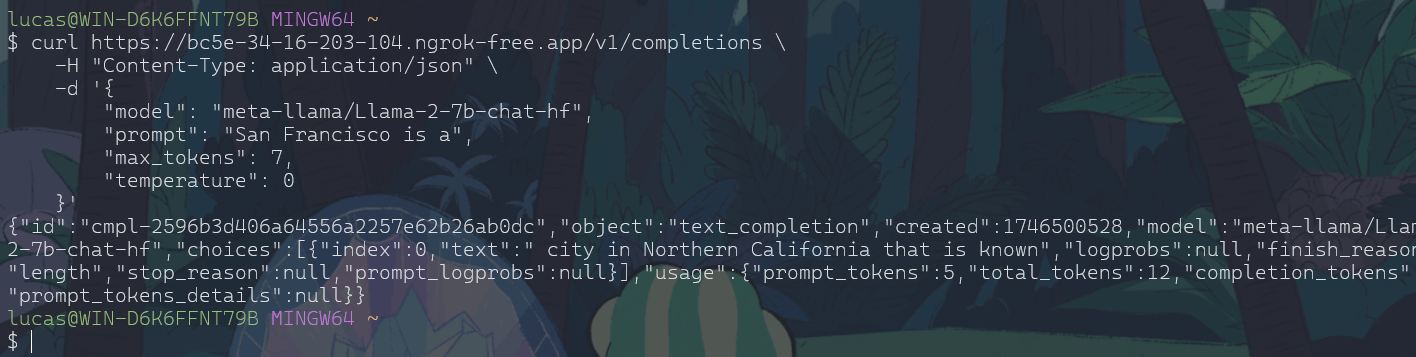

## Streamlit

In [ ]:
!pip install vllm lm-format-enforcer pandas streamlit chromadb vllm PyPDF2

In [ ]:
!pip install pyngrok

In [ ]:
from google.colab import userdata
NGROK_TOKEN = userdata.get('NGROK_TOKEN')

In [ ]:
!ngrok config add-authtoken $NGROK_TOKEN

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from huggingface_hub import notebook_login, login
from google.colab import userdata

HF_KEY = userdata.get('HF_KEY')
login(token=HF_KEY)

## vLLM

In [ ]:
%%writefile app.py
import streamlit as st
import os
from PyPDF2 import PdfReader
import chromadb
from vllm import LLM
import numpy as np

llm = LLM(model="meta-llama/Llama-2-7b-chat-hf", gpu_memory_utilization=0.9, max_model_len=752)

# Função para extrair texto do PDF
def extract_text_from_pdf(pdf_file):
    pdf_reader = PdfReader(pdf_file)
    text = ""
    for page in pdf_reader.pages:
        text += page.extract_text()
    return text

# Função para inicializar o cliente do chromadb
def init_chroma():
    client = chromadb.Client()
    return client

# Função para armazenar documento no ChromaDB
def store_document_in_chroma(client, document_text, collection_name="documents"):
    collection = client.create_collection(name=collection_name)
    collection.add(
        documents=[document_text],
        metadatas=[{"source": "uploaded_pdf"}],
        ids=["doc_1"]
    )

# Função para buscar uma resposta com vLLM
def get_answer_from_llm(question, context):
    prompt = f"Question: {question}\nContext: {context}\nAnswer:"
    response = llm.generate(prompt)
    return response['text']

# Interface Streamlit
st.title("Document QA with vLLM and Chromadb")

# Upload do documento
uploaded_file = st.file_uploader("Upload a document", type=["pdf", "txt"])

if uploaded_file:
    if uploaded_file.type == "application/pdf":
        document_text = extract_text_from_pdf(uploaded_file)
    else:
        document_text = uploaded_file.getvalue().decode("utf-8")

    # Inicializa o cliente do chromadb e armazena o documento
    client = init_chroma()
    store_document_in_chroma(client, document_text)

    st.success("Documento carregado com sucesso!")

    # Pergunta do usuário
    question = st.text_input("Digite sua pergunta:")

    if question:
        # Recupera a resposta do LLM
        answer = get_answer_from_llm(question, document_text)
        st.write(f"Resposta: {answer}")


Writing app.py


## vLLM externo

In [ ]:
%%writefile app.py
import streamlit as st
import requests
import json
from PyPDF2 import PdfReader
import chromadb
from langchain.text_splitter import CharacterTextSplitter

prompt_template = """
Você é um assistente que precisa responder às dúvidas de um usuário com base em um documento fornecido como contexto.

Esse é o documento:
{context}

Essa é a pergunta do usuário:
{question}

Responda a pergunta do usuário com base no documento fornecido.
"""

def extract_text_from_pdf(pdf_file):
    pdf_reader = PdfReader(pdf_file)
    text = ""
    for page in pdf_reader.pages:
        text += page.extract_text()
    return text

def store_document_in_chroma(client, document_text, collection_name="documents"):
    text_splitter = CharacterTextSplitter(chunk_size=128, chunk_overlap=0)
    texts = text_splitter.split_text(document_text)
    collection = client.get_or_create_collection(name=collection_name)
    collection.add(
        documents=texts,
        metadatas=[{"source": "uploaded_pdf"}] * len(texts),
        ids=[f"doc_{i}" for i in range(len(texts))]
    )

def retrieve_relevant_documents(client, question, collection_name="documents", n_results=1):
    collection = client.get_collection(name=collection_name)
    results = collection.query(
        query_texts=[question],
        n_results=n_results
    )
    return results["documents"]

def get_answer_from_llm(question, context):
    prompt = prompt_template.format(context=context, question=question)
    print("prompt", prompt)
    url = "http://localhost:8000/v1/chat/completions"
    headers = {"Content-Type": "application/json"}
    payload = {
        "model": "clibrain/Llama-2-7b-ft-instruct-es-gptq-4bit",
        "messages": [
            {"role": "system", "content": "Você é um assistente útil."},
            {"role": "user", "content": prompt},
        ],
        "max_tokens": 512
    }
    response = requests.post(url, headers=headers, data=json.dumps(payload))
    if response.status_code == 200:
        return response.json()["choices"][0]["message"]["content"]
    else:
        return "Erro ao obter resposta do modelo."

st.title("Document QA with vLLM and ChromaDB")

uploaded_file = st.file_uploader("Upload a document", type=["pdf", "txt"])

if uploaded_file:
    document_text = uploaded_file.getvalue().decode("utf-8") if uploaded_file.type == "text/plain" else extract_text_from_pdf(uploaded_file)
    client = chromadb.Client()
    store_document_in_chroma(client, document_text)
    st.success("Documento carregado com sucesso!")

    question = st.text_input("Digite sua pergunta:")
    if question:
        context = retrieve_relevant_documents(client, question)
        answer = get_answer_from_llm(question, context)
        st.write(f"Resposta: {answer}")


Writing app.py


In [ ]:
%%writefile chat_template.jinja
{% for message in messages %}
    {% if message['role'] == 'user' %}
        [USER]: {{ message['content'] }}
    {% elif message['role'] == 'assistant' %}
        [ASSISTANT]: {{ message['content'] }}
     {% elif message['role'] == 'system' %}
        [SYSTEM]: {{ message['content'] }}
    {% endif %}
{% endfor %}

Overwriting chat_template.jinja


In [ ]:
!vllm serve clibrain/Llama-2-7b-ft-instruct-es-gptq-4bit \
  --chat-template ./chat_template.jinja \
    --max-model-len 16000 \
    --quantization awq \
    --gpu-memory-utilization 0.95 \
    --chat-template-content-format string \
    & streamlit run app.py \
    & ngrok http 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.141.212.61:8501

  Stopping...
Traceback (most recent call last):
  File "/usr/local/bin/ngrok", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pyngrok/ngrok.py", line 682, in main
    run(sys.argv[1:])
  File "/usr/local/lib/python3.11/dist-packages/pyngrok/ngrok.py", line 670, in run
    process.run_process(pyngrok_config.ngrok_path, args)
  File "/usr/local/lib/python3.11/dist-packages/pyngrok/process.py", line 311, in run_process
    subprocess.call(start)
  File "/usr/lib/python3.11/subprocess.py", line 391, in call
    return p.wait(timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/subprocess.py", line 1264, in wait
    return self._wait(timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/subprocess.py

KeyboardInterrupt: 

## vLLM Stream

In [ ]:
%%writefile app.py
import streamlit as st
import requests
import json
from PyPDF2 import PdfReader
import chromadb
from langchain.text_splitter import CharacterTextSplitter

prompt_template = """
Você é um assistente que precisa responder às dúvidas de um usuário com base em um documento fornecido como contexto.

Esse é o documento:
{context}

Essa é a pergunta do usuário:
{question}

Responda a pergunta do usuário com base no documento fornecido.
"""

def extract_text_from_pdf(pdf_file):
    pdf_reader = PdfReader(pdf_file)
    text = ""
    for page in pdf_reader.pages:
        text += page.extract_text()
    return text

def store_document_in_chroma(client, document_text, collection_name="documents"):
    text_splitter = CharacterTextSplitter(chunk_size=128, chunk_overlap=0)
    texts = text_splitter.split_text(document_text)
    collection = client.get_or_create_collection(name=collection_name)
    collection.add(
        documents=texts,
        metadatas=[{"source": "uploaded_pdf"}] * len(texts),
        ids=[f"doc_{i}" for i in range(len(texts))]
    )

def retrieve_relevant_documents(client, question, collection_name="documents", n_results=1):
    collection = client.get_collection(name=collection_name)
    results = collection.query(
        query_texts=[question],
        n_results=n_results
    )
    return results["documents"]

def get_answer_from_llm(question, context):
    prompt = prompt_template.format(context=context, question=question)
    print("prompt", prompt)
    url = "http://localhost:8000/v1/chat/completions"
    headers = {"Content-Type": "application/json"}
    payload = {
        "model": "unsloth/Qwen3-8B-bnb-4bit",
        "messages": [
            {"role": "system", "content": "Você é um assistente útil."},
            {"role": "user", "content": prompt},
        ],
        "stream": True,
        "max_tokens": 2048
    }
    response = requests.post(url, headers=headers, data=json.dumps(payload), stream=True)
    if response.status_code == 200:
        for line in response.iter_lines():
            if line:
                decoded_line = line.decode("utf-8")
                if decoded_line.startswith("data:"):
                    data = decoded_line[5:].strip()
                    if data == "[DONE]":
                        break
                    try:
                        chunk = json.loads(data)
                        content = chunk["choices"][0]["delta"].get("content", "")
                        if content:
                            yield content
                    except json.JSONDecodeError:
                        continue
    else:
        yield "Erro ao obter resposta do modelo."

st.title("Document QA with vLLM and ChromaDB")

uploaded_file = st.file_uploader("Upload a document", type=["pdf", "txt"])

if uploaded_file:
    document_text = uploaded_file.getvalue().decode("utf-8") if uploaded_file.type == "text/plain" else extract_text_from_pdf(uploaded_file)
    client = chromadb.Client()
    store_document_in_chroma(client, document_text)
    st.success("Documento carregado com sucesso!")

    question = st.text_input("Digite sua pergunta:")
    if question:
        context = retrieve_relevant_documents(client, question)
        answer_placeholder = st.empty()
        response = ""
        for answer_chunk in get_answer_from_llm(question, context):
            response += answer_chunk
            answer_placeholder.markdown(response)


Writing app.py


In [ ]:
!vllm serve clibrain/Llama-2-7b-ft-instruct-es-gptq-4bit \
  --multi-step-stream-outputs \
  --chat-template ./chat_template.jinja \
    --max-model-len 4096 \
    --quantization gptq \
    --gpu-memory-utilization 0.95 \
    --chat-template-content-format string \
    & streamlit run app.py \
    & ngrok http 8501

In [ ]:
%%bash
sudo apt-get update  -y
sudo apt-get install -y gcc-12 g++-12 libnuma-dev python3-dev
sudo update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-12 10 --slave /usr/bin/g++ g++ /usr/bin/g++-12

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [24.6 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,934 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,676 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [4,363 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:13 http://

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 7.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


In [ ]:
!git clone https://github.com/vllm-project/vllm.git vllm_src
# !mv -f vllm_src/* .

Cloning into 'vllm_src'...
remote: Enumerating objects: 75350, done.
remote: Counting objects: 100% (164/164), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 75350 (delta 81), reused 44 (delta 39), pack-reused 75186 (from 3)
Receiving objects: 100% (75350/75350), 52.15 MiB | 19.99 MiB/s, done.
Resolving deltas: 100% (58884/58884), done.


In [ ]:
!rm -rf ./*

In [ ]:
%%bash
pip install --upgrade pip
pip install "cmake>=3.26" wheel packaging ninja "setuptools-scm>=8" numpy
pip install -v -r requirements/cpu.txt --extra-index-url https://download.pytorch.org/whl/cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Using pip 25.1.1 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu, https://download.pytorch.org/whl/cpu
Ignoring importlib_metadata: markers 'python_version < "3.10"' don't match your environment
Ignoring six: markers 'python_version > "3.11"' don't match your environment
Ignoring setuptools: markers 'python_version > "3.11"' don't match your environment
Ignoring torch: markers 'platform_system == "Darwin"' don't match your environment
Ignoring torch: markers 'platform_machine == "ppc64le" or platform_machine == "aarch64"' don't match your environment
Ignoring torch: markers 'platform_machine == "s390x"' don't match your environment
Ignoring torchaudio: markers 'platform_mach

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xformers 0.0.29.post2 requires torch==2.6.0, but you have torch 2.7.0+cpu which is incompatible.
vllm 0.8.5.post1 requires compressed-tensors==0.9.3, but you have compressed-tensors 0.9.4 which is incompatible.
vllm 0.8.5.post1 requires torch==2.6.0, but you have torch 2.7.0+cpu which is incompatible.
vllm 0.8.5.post1 requires torchaudio==2.6.0, but you have torchaudio 2.7.0+cpu which is incompatible.
vllm 0.8.5.post1 requires torchvision==0.21.0, but you have torchvision 0.22.0+cpu which is incompatible.
vllm 0.8.5.post1 requires xgrammar==0.1.18; platform_machine == "x86_64" or platform_machine == "aarch64", but you have xgrammar 0.1.19 which is incompatible.
fastai 2.7.19 requires torch<2.7,>=1.10, but you have torch 2.7.0+cpu which is incompatible.


In [ ]:
!cd vllm_src && VLLM_TARGET_DEVICE=cpu python setup.py install

running install
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https

In [ ]:
!cd vllm_src && VLLM_TARGET_DEVICE=cpu python setup.py develop

running develop
/usr/local/lib/python3.11/dist-packages/setuptools/command/develop.py:41: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://github.com/pypa/setuptools/issues/917 for details.
        ********************************************************************************

!!
  easy_install.initialize_options(self)
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog

In [ ]:
!vllm serve unsloth/Qwen3-8B-bnb-4bit \
  --multi-step-stream-outputs \
    --max-num-batched-tokens 2048 \
    --dtype 'float16' \
    & streamlit run app.py \
    & ngrok http 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.141.206.137:8501

DEBUG 05-16 23:44:02 [__init__.py:28] No plugins for group vllm.platform_plugins found.
DEBUG 05-16 23:44:02 [__init__.py:34] Checking if TPU platform is available.
DEBUG 05-16 23:44:02 [__init__.py:44] TPU platform is not available because: No module named 'libtpu'
DEBUG 05-16 23:44:02 [__init__.py:52] Checking if CUDA platform is available.
DEBUG 05-16 23:44:02 [__init__.py:76] Exception happens when checking CUDA platform: NVML Shared Library Not Found
DEBUG 05-16 23:44:02 [__init__.py:93] CUDA platform is not available because: NVML Shared Library Not Found
DEBUG 05-16 23:44:02 [__init__.py:100] Checking if ROCm platform is available.
DEBUG 05-16 23:44:02 [__init__.py:114] ROCm platform is not available because: No module named 'amdsmi'
DEBUG 05-16 23:44:02 [__init__.py:122] Checking if HPU platform is avail

In [ ]:
!export VLLM_TARGET_DEVICE=cpu  && echo $VLLM_TARGET_DEVICE

cpu


In [ ]:
--multi-step-stream-outputs --max-model-len 2048 --disable-async-output-proc

In [ ]:
!export VLLM_TARGET_DEVICE=cpu && vllm serve unsloth/Qwen3-8B-bnb-4bit \
  --multi-step-stream-outputs \
  --max-model-len 2048 \
  --disable-async-output-proc \
  --dtype 'float16' \
  & streamlit run app.py \
  & ngrok http 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.141.206.137:8501

INFO 05-16 23:53:13 [__init__.py:243] No platform detected, vLLM is running on UnspecifiedPlatform
2025-05-16 23:53:13.871568: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747439593.896558   18058 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747439593.903781   18058 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-16 23:53:13.928957: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in perform

Essa é a resposta: Este é um documento sobre "Parallel e Scalable Dunn Index para Validation of Big Data Clusters"

Seu inglês ficará péssimo, em vez de tudo isso.

Essa é uma área não programátil que precisa ser atendida por modelo de lógica. Não se precisam milhões de ecuações dedutivas anotáveis ou redutríveis a máquinas. O resultado é mais um conhecimento no projeto.

Para automate ta roxima, possível até mesmo texto. A herança e desenvolvimento de conhecimentos estão atrasados dos avanços tecnológicos.

Em vez de expor consistentemente a coordenação das atividades mentais humanas, as ciências sociais, comunicação, criação/transmissão de conhecimentos, sejam qual elas, com e sem modelizar nos comunicária tecnológica, foco no conteúdo da pessoa e sua habilidade a expressarlo-lo de uma forma significante e significada, não nos faz progressar em nada.



## Ollama

In [ ]:
!pip install ollama
!curl -fsSL https://ollama.com/install.sh | sh

In [ ]:
!pip install colab-xterm
%load_ext colabxterm

In [ ]:
%xterm

In [ ]:
!ollama pull llama2:7b

In [ ]:
%%writefile app.py
import streamlit as st
import requests
import json
from PyPDF2 import PdfReader
import chromadb
from langchain.text_splitter import CharacterTextSplitter

import ollama

def get_answer_from_ollama(question, context):
    prompt = f"""
    Você é um assistente que precisa responder às dúvidas de um usuário com base em um documento fornecido como contexto.

    contexto:
    {context}

    pergunta:
    {question}

    Resposta:
    """
    print("Prompt:", prompt)

    stream = ollama.chat(
        model="llama2:7b",
        messages=[
            {"role": "system", "content": "Você é um assistente útil."},
            {"role": "user", "content": prompt},
        ],
        stream=True,
    )

    resposta = ""
    for chunk in stream:
        conteudo = chunk['message']['content']
        if conteudo:
            resposta += conteudo
            print(conteudo, end='', flush=True)

    return resposta

def extract_text_from_pdf(pdf_file):
    pdf_reader = PdfReader(pdf_file)
    text = ""
    for page in pdf_reader.pages:
        text += page.extract_text()
    return text

def store_document_in_chroma(client, document_text, collection_name="documents"):
    text_splitter = CharacterTextSplitter(chunk_size=128, chunk_overlap=0)
    texts = text_splitter.split_text(document_text)
    collection = client.get_or_create_collection(name=collection_name)
    collection.add(
        documents=texts,
        metadatas=[{"source": "uploaded_pdf"}] * len(texts),
        ids=[f"doc_{i}" for i in range(len(texts))]
    )

def retrieve_relevant_documents(client, question, collection_name="documents", n_results=1):
    collection = client.get_collection(name=collection_name)
    results = collection.query(
        query_texts=[question],
        n_results=n_results
    )
    return results["documents"]


st.title("Document QA with Ollama and ChromaDB")

uploaded_file = st.file_uploader("Upload a document", type=["pdf", "txt"])

if uploaded_file:
    document_text = uploaded_file.getvalue().decode("utf-8") if uploaded_file.type == "text/plain" else extract_text_from_pdf(uploaded_file)
    client = chromadb.Client()
    store_document_in_chroma(client, document_text)
    st.success("Documento carregado com sucesso!")

    question = st.text_input("Digite sua pergunta:")
    if question:
        context = retrieve_relevant_documents(client, question)
        answer_placeholder = st.empty()
        response = ""
        for answer_chunk in get_answer_from_ollama(question, context):
            response += answer_chunk
            answer_placeholder.markdown(response)


Overwriting app.py


In [ ]:
!streamlit run app.py \
    & ngrok http 8501

curl: (7) Failed to connect to localhost port 11434 after 0 ms: Connection refused


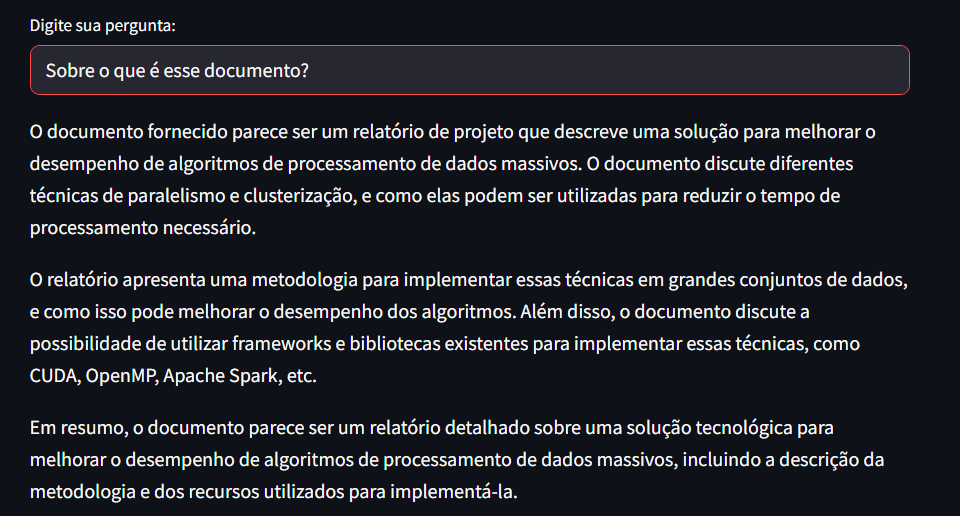